In [80]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesful')

Libraries Import Succesful


In [53]:
filename='C:/Users/swati/Desktop/prasoon/Data science classes/capstone project/major project/Problem2_Site_BrowingBehavior.txt'
dataset=pd.read_csv(filename, delimiter='\t', header=None)
dataset.columns=['Timestamp', 'UserID', 'Website_section_visited']
dataset.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


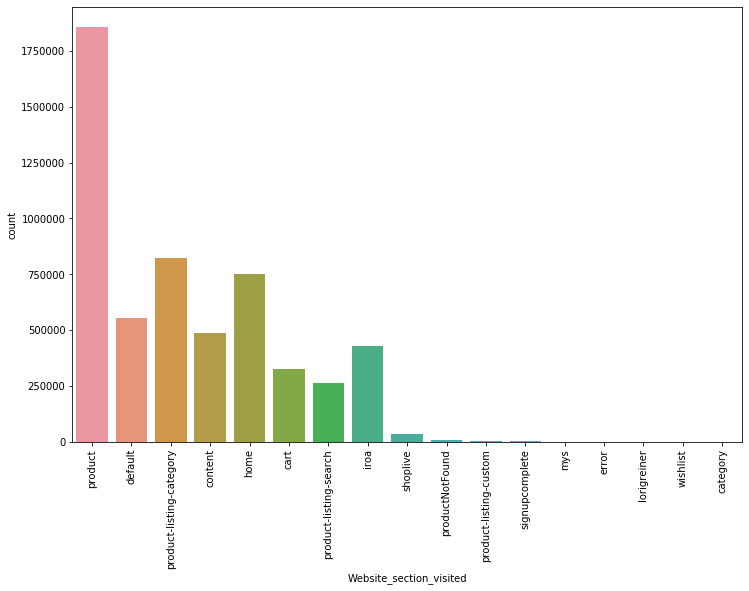

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(dataset['Website_section_visited'])
plt.xticks(rotation=90);

In [55]:
dataset.shape

(5535924, 3)

In [56]:
dataset.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

In [57]:
dataset.info

<bound method DataFrame.info of                        Timestamp               UserID  \
0        2017-07-26 00:01:40.965                    0   
1        2017-07-26 00:03:18.448                    0   
2        2017-07-26 00:36:59.028                    0   
3        2017-07-26 00:41:17.273                    0   
4        2017-07-26 00:45:39.197                    0   
...                          ...                  ...   
5535919  2017-07-26 23:18:53.789  9221827579306644828   
5535920  2017-07-26 23:19:03.394  9221827579306644828   
5535921  2017-07-26 23:19:11.569  9221827579306644828   
5535922  2017-07-26 23:21:56.085  9221827579306644828   
5535923  2017-07-26 23:16:32.835  9223103337073924884   

          Website_section_visited  
0                         product  
1                         product  
2                         default  
3        product-listing-category  
4                         content  
...                           ...  
5535919                      ir

In [58]:
dataset['UserID'].nunique()

516932

In [59]:
dataset['Website_section_visited'].value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
category                          1
wishlist                          1
Name: Website_section_visited, dtype: int64

In [60]:
Login_count=dataset.groupby('UserID').Website_section_visited.agg(['count']).reindex(dataset.UserID).reset_index()

Login_count.columns=['UserID', 'No_of_times_visited']

Login_count.drop_duplicates(inplace=True)

Login_count.head()

,UserID,No_of_times_visited
0,0,1407879
101129,544439661706349,10
101130,634394594974068,19
101134,887103105578626,10
101136,962713767308725,18


In [61]:
filename='C:/Users/swati/Desktop/prasoon/Data science classes/capstone project/major project/Problem2_FinalConversions.txt'
final_conversions=pd.read_csv(filename, sep='\t', header=None)
final_conversions.columns=['Timestamp', 'UserID', 'Products_Purchased','Cart_Value']
final_conversions.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.140
1,2017-07-26 00:00:12.301,0,H209597,31.500
2,2017-07-26 00:00:12.388,0,H211370,30.480
3,2017-07-26 00:00:14.389,0,A282331,51.000
4,2017-07-26 00:00:16.837,0,H211410,16.740


In [62]:
final_conversions.shape

(79795, 4)

In [63]:
df_final=pd.merge(final_conversions,dataset,on=['UserID'],how='inner',left_index=True,right_index=True)

df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.140,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.500,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.480,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.000,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.740,2017-07-26 00:45:39.197,content


In [64]:
df_final['Timestamp_x'] = df_final['Timestamp_x'].astype(str)
df_final['Timestamp_y'] = df_final['Timestamp_y'].astype(str)

df_final['Timestamp_x'] = df_final['Timestamp_x'].str.split('.' , expand=True)

print(df_final['Timestamp_x'][:3])

print('-------------------------------')

df_final['Timestamp_y'] = df_final['Timestamp_y'].str.split('.' , expand=True)

print(df_final['Timestamp_y'][:3])

0    2017-07-26 00:00:10
1    2017-07-26 00:00:12
2    2017-07-26 00:00:12
Name: Timestamp_x, dtype: object
-------------------------------
0    2017-07-26 00:01:40
1    2017-07-26 00:03:18
2    2017-07-26 00:36:59
Name: Timestamp_y, dtype: object


In [65]:
df_final['Date_time_x']=pd.to_datetime(df_final['Timestamp_x'])
df_final['Date_time_y']=pd.to_datetime(df_final['Timestamp_y'])

In [66]:
import datetime
from datetime import timedelta

def Time_conversion(df_final):
    time_delta=df_final['Date_time_y']-df_final['Date_time_x']
    total_seconds=time_delta.total_seconds()
    minutes=total_seconds/60
    
    return abs(minutes)

In [67]:
df_final['Time_spent_Minutes_day']=df_final.apply(Time_conversion, axis=1)

df_final.drop(['Timestamp_x','Timestamp_y', 'Date_time_x', 'Date_time_y'], axis=1, inplace=True)

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.500
1,0,H209597,31.500,product,3.100
2,0,H211370,30.480,default,36.783
3,0,A282331,51.000,product-listing-category,41.050
4,0,H211410,16.740,content,45.383


In [68]:
df_cart=df_final.groupby('UserID')['Cart_Value'].agg(['sum']).reindex(df_final['UserID']).reset_index()

df_cart.drop_duplicates(inplace=True)

df_cart.columns=['UserID', 'Total_cart_value']

df_cart.head()

,UserID,Total_cart_value
0,0,1375101.660
548,5942997097932061,157.950
549,23951842225160889,60.960
551,30833658052409950,216.120
552,33873861847792934,53.240


In [69]:
df_cart_Products=df_final.groupby('UserID')['Products_Purchased'].agg(['count']).reindex(df_final['UserID']).reset_index()

df_cart_Products.drop_duplicates(inplace=True)

df_cart_Products.columns=['UserID', 'Total_Products_Purchased']

df_cart_Products.head()

,UserID,Total_Products_Purchased
0,0,20197
548,5942997097932061,1
549,23951842225160889,2
551,30833658052409950,5
552,33873861847792934,1


In [70]:
df_cart_timestamp=df_final.groupby('UserID')['Time_spent_Minutes_day'].agg(['sum']).reindex(df_final['UserID']).reset_index()

df_cart_timestamp.drop_duplicates(inplace=True)

pd.set_option('display.float_format', lambda x: '%.3f'%x)

df_cart_timestamp.columns=['UserID', 'Total_Time_Spent']
df_cart_timestamp.head()

,UserID,Total_Time_Spent
0,0,11780947.583
548,5942997097932061,0.450
549,23951842225160889,52.067
551,30833658052409950,381.183
552,33873861847792934,10.050


In [71]:
df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.500
1,0,H209597,31.500,product,3.100
2,0,H211370,30.480,default,36.783
3,0,A282331,51.000,product-listing-category,41.050
4,0,H211410,16.740,content,45.383


In [72]:
df_final.drop_duplicates(subset='UserID', keep= 'first',inplace=True)

df_final=pd.merge(df_final,df_cart, on=['UserID'], how='inner', left_index=True)

df_final=pd.merge(df_final,df_cart_Products, on=['UserID'], how='inner', left_index=True)

df_final=pd.merge(df_final,df_cart_timestamp, on=['UserID'], how='inner', left_index=True)

df_final=pd.merge(df_final,Login_count, on=['UserID'], how='inner')

df_final.head()


,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,A293532,52.140,product,1.500,1375101.660,20197,11780947.583,1407879
1,23951842225160889,H211370,33.480,product-listing-search,26.033,60.960,2,52.067,8
2,30833658052409950,H211394,44.680,content,54.917,216.120,5,381.183,13
3,33873861847792934,H211800,53.240,product,10.050,53.240,1,10.050,5
4,42949238806579040,A286591,30.000,default,14.433,52.480,2,1424.217,20


In [73]:

df_final.drop(['Products_Purchased', 'Cart_Value', 'Website_section_visited','Time_spent_Minutes_day'],axis=1,inplace=True)

In [74]:
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,1375101.660,20197,11780947.583,1407879
1,23951842225160889,60.960,2,52.067,8
2,30833658052409950,216.120,5,381.183,13
3,33873861847792934,53.240,1,10.050,5
4,42949238806579040,52.480,2,1424.217,20


In [75]:
df_final['Buy_probablity'] = (df_final['Total_Products_Purchased']/df_final['No_of_times_visited'])
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probablity
0,0,1375101.660,20197,11780947.583,1407879,0.014
1,23951842225160889,60.960,2,52.067,8,0.250
2,30833658052409950,216.120,5,381.183,13,0.385
3,33873861847792934,53.240,1,10.050,5,0.200
4,42949238806579040,52.480,2,1424.217,20,0.100


In [76]:
df_final['User_Score_Rank']=df_final['Buy_probablity']*df_final['Total_cart_value']
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probablity,User_Score_Rank
0,0,1375101.660,20197,11780947.583,1407879,0.014,19726.786
1,23951842225160889,60.960,2,52.067,8,0.250,15.240
2,30833658052409950,216.120,5,381.183,13,0.385,83.123
3,33873861847792934,53.240,1,10.050,5,0.200,10.648
4,42949238806579040,52.480,2,1424.217,20,0.100,5.248


In [77]:
df_final.drop(df_final.index[0],inplace=True)
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probablity,User_Score_Rank
1,23951842225160889,60.960,2,52.067,8,0.250,15.240
2,30833658052409950,216.120,5,381.183,13,0.385,83.123
3,33873861847792934,53.240,1,10.050,5,0.200,10.648
4,42949238806579040,52.480,2,1424.217,20,0.100,5.248
5,53342625381053594,111.980,2,80.583,18,0.111,12.442


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df_final.drop(['User_Score_Rank'],axis=1)
y=df_final[['User_Score_Rank']]

sc=StandardScaler()
X=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(32682, 6) (8171, 6)
(32682, 1) (8171, 1)


In [82]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

classifier_rf=RandomForestRegressor()

classifier_rf.fit(X_train,y_train)

pred=classifier_rf.predict(X_test)

print('RMSE:',sqrt(mean_squared_error(y_test,pred)))
print('MSE:', mean_squared_error(y_test,pred))
print('R2:', r2_score(y_test,pred))




RMSE: 23.200095586128224
MSE: 538.2444352054863
R2: 0.5471948874969621


In [83]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[200,300,400,500,600]
max_features=['auto','sqrt']
max_depth=[20,40,50,60,80]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,3,4,5]
bootstrap=[True,False]

random_grid={'n_estimators': n_estimators,'max_features':max_features, 'max_depth': max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

random_cv2=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,n_iter=50,scoring='neg_mean_absolute_error',cv=5, verbose=5,random_state=42,n_jobs=-1,return_train_score=True)

random_cv2.fit(X_train,y_train)





Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 68.8min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 114.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [86]:
random_cv2.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [87]:
classifier=RandomForestRegressor(**random_cv2.best_params_)
classifier.fit(X_train,y_train)

pred=classifier.predict(X_test)


print('RMSE:',sqrt(mean_squared_error(y_test,pred)))
print('MSE:', mean_squared_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

RMSE: 20.0698540529846
MSE: 402.7990417081023
R2: 0.6611400815929996
